In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
path = ''
df = pd.read_csv(path + 'HI-Medium_Trans.csv')
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:17,20,800104D70,20,800104D70,6794.63,US Dollar,6794.63,US Dollar,Reinvestment,0
1,2022/09/01 00:02,3196,800107150,3196,800107150,7739.29,US Dollar,7739.29,US Dollar,Reinvestment,0
2,2022/09/01 00:17,1208,80010E430,1208,80010E430,1880.23,US Dollar,1880.23,US Dollar,Reinvestment,0
3,2022/09/01 00:03,1208,80010E650,20,80010E6F0,73966883.00,US Dollar,73966883.00,US Dollar,Cheque,0
4,2022/09/01 00:02,1208,80010E650,20,80010EA30,45868454.00,US Dollar,45868454.00,US Dollar,Cheque,0


In [3]:
# Check the data types of the columns
df.info()

# Check the number of missing values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31898238 entries, 0 to 31898237
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 2.6+ GB


Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [ ]:
# Distribution of the target variable
df['Is Laundering'].value_counts()

Is Laundering
0    31863008
1       35230
Name: count, dtype: int64

In [5]:
# Converting Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'].head()

0   2022-09-01 00:17:00
1   2022-09-01 00:02:00
2   2022-09-01 00:17:00
3   2022-09-01 00:03:00
4   2022-09-01 00:02:00
Name: Timestamp, dtype: datetime64[ns]

In [ ]:
# Unique values in each column
df.nunique()

Timestamp               26086
From Bank              122330
Account               2013627
To Bank                 62820
Account.1             1689925
Amount Received       2824359
Receiving Currency         15
Amount Paid           2850751
Payment Currency           15
Payment Format              7
Is Laundering               2
dtype: int64

In [ ]:
# Any duplicate rows and which class they belong to
df[df.duplicated()]

# Drop the duplicate rows
df.drop_duplicates(inplace=True)

C:\Users\nisar\AppData\Local\Temp\ipykernel_9664\3730821194.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Hour', data=df[df['Is Laundering'] == 1],bins=24, palette='viridis', label='Laundering')


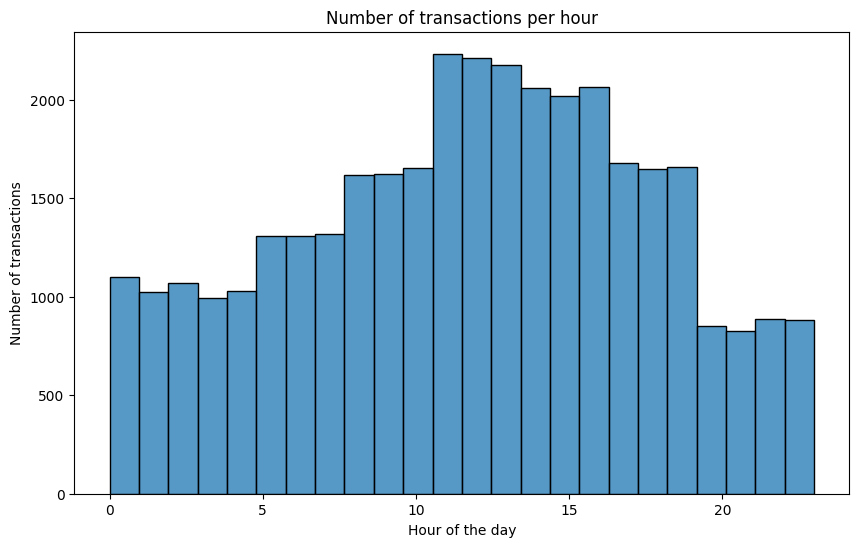

In [8]:
# Plot for which hour of the day has the most transactions 
df['Hour'] = df['Timestamp'].dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(x='Hour', data=df[df['Is Laundering'] == 1],bins=24, palette='viridis', label='Laundering')
plt.title('Number of transactions per hour')
plt.xlabel('Hour of the day')
plt.ylabel('Number of transactions')
plt.show()

In [9]:
# Percentage of transactions that are laundering vs non-laundering
df['Is Laundering'].value_counts(normalize=True) * 100

Is Laundering
0    99.889555
1     0.110445
Name: proportion, dtype: float64

C:\Users\nisar\AppData\Local\Temp\ipykernel_9664\3236933162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Format', data=df[df['Is Laundering'] == 1], palette='viridis')


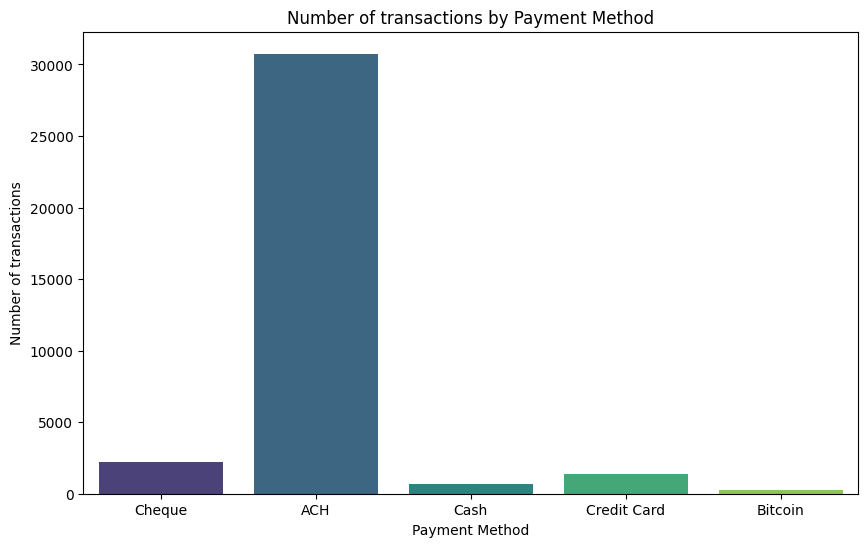

In [10]:
# Plot payment method vs Is Laundering
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Format', data=df[df['Is Laundering'] == 1], palette='viridis')
plt.title('Number of transactions by Payment Method')  
plt.xlabel('Payment Method')
plt.ylabel('Number of transactions')
plt.show()

In [11]:
# Mean transaction amount for laundering vs non-laundering transactions
df.groupby('Is Laundering')['Amount Paid'].mean()

Is Laundering
0    4.363708e+06
1    5.311675e+07
Name: Amount Paid, dtype: float64

C:\Users\nisar\AppData\Local\Temp\ipykernel_9664\1639131924.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Currency', data=df[df['Is Laundering'] == 1], palette='viridis')


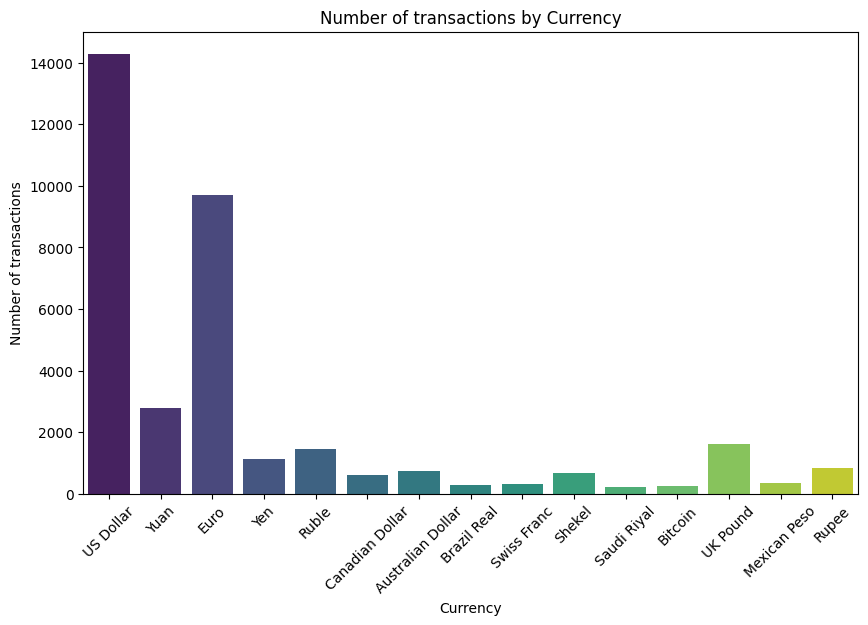

In [12]:
# Plot of currency vs Is Laundering
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Currency', data=df[df['Is Laundering'] == 1], palette='viridis')
plt.title('Number of transactions by Currency')
plt.xlabel('Currency')
plt.ylabel('Number of transactions')
plt.xticks(rotation=45)
plt.show()

In [13]:
#Undersampling of Is Laundering = 0 Legitimate transactions
df_laundering = df[df['Is Laundering'] == 1]
df_legitimate = df[df['Is Laundering'] == 0].sample(n=len(df_laundering)*2, random_state=42)


In [26]:
#Concatenating the two dataframes as per timestamp
df_balanced = pd.concat([df_laundering, df_legitimate]).sort_values('Timestamp')
df_balanced['Is Laundering'].value_counts()

Is Laundering
0    70460
1    35230
Name: count, dtype: int64

In [27]:
#Unique values in each column
df_balanced.nunique()

Timestamp             25345
From Bank              7863
Account               80350
To Bank                6658
Account.1             92514
Amount Received       94994
Receiving Currency       15
Amount Paid           95051
Payment Currency         15
Payment Format            7
Is Laundering             2
Hour                     24
dtype: int64

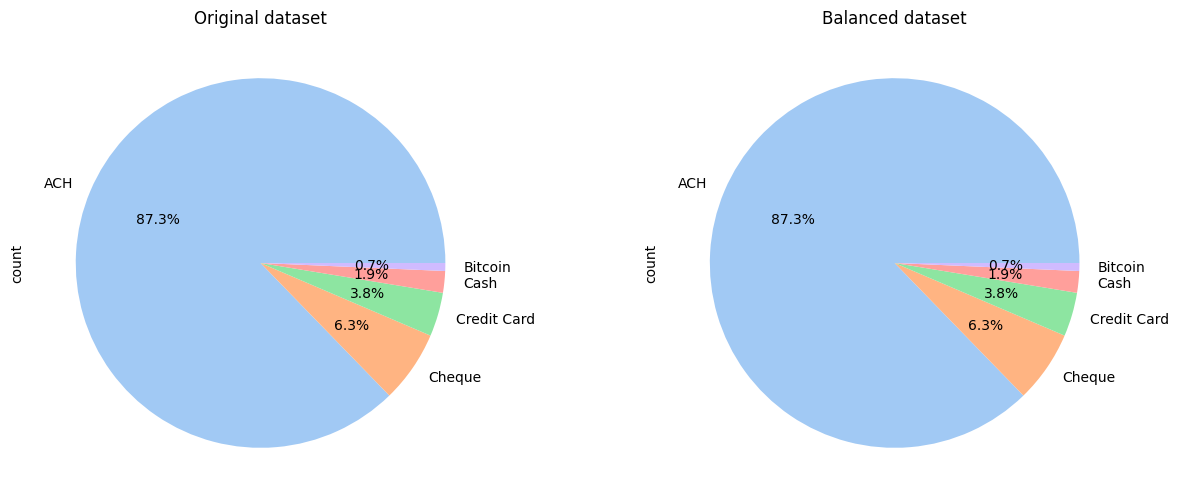

Original Shae: (31898218, 12)
Balanced Shape: (105690, 12)


In [29]:
#Plot original vs balanced dataset for Payment Format pie chart for Is Laundering = 1
import seaborn as sns
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title('Original dataset')
sns.set_palette("pastel")
df[df['Is Laundering'] == 1]['Payment Format'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1, 2, 2)
plt.title('Balanced dataset')
sns.set_palette("pastel")
df_balanced[df_balanced['Is Laundering'] == 1]['Payment Format'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

print('Original Shae:', df.shape)
print('Balanced Shape:', df_balanced.shape)

In [35]:
#Any missing values in the balanced dataset
df_balanced.isnull().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
Hour                  0
dtype: int64

In [36]:
#Encoding the for Payment Format, Payment Currency and Receiving Currency
df_encoded = pd.get_dummies(df_balanced, columns=['Payment Format', 'Payment Currency', 'Receiving Currency'], drop_first=True)

#Falso to 0 and True to 1
df_encoded = df_encoded.replace({False: 0, True: 1})
df_encoded.head()


C:\Users\nisar\AppData\Local\Temp\ipykernel_9664\3431033851.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({False: 0, True: 1})


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Amount Paid,Is Laundering,Hour,Payment Format_Bitcoin,...,Receiving Currency_Mexican Peso,Receiving Currency_Ruble,Receiving Currency_Rupee,Receiving Currency_Saudi Riyal,Receiving Currency_Shekel,Receiving Currency_Swiss Franc,Receiving Currency_UK Pound,Receiving Currency_US Dollar,Receiving Currency_Yen,Receiving Currency_Yuan
732807,2022-09-01,228997,83EF6B6E0,228997,83EF6B6E0,16.93,16.93,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100418,2022-09-01,126794,80E64ADF0,126794,80E64ADF0,17.66,17.66,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1286274,2022-09-01,1201465,84C736A10,1201465,84C736A10,10902.56,10902.56,0,0,0,...,0,0,0,1,0,0,0,0,0,0
422580,2022-09-01,110059,8489FDF10,110059,8489FDF10,358.57,358.57,0,0,0,...,0,0,0,0,0,0,0,1,0,0
928974,2022-09-01,262126,817AC32D0,65994,81A1FB180,1785.30,1785.30,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
df_encoded.shape

(105690, 43)